## IMPORTS

In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
%matplotlib inline
from datetime import datetime

In [79]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Data Collecting 

In [80]:
symbol = "AAPL"
start_date = "2018-03-09"
end_date = datetime.today().strftime('%Y-%m-%d')

Apple = yf.download(symbol, start=start_date, end=end_date)
print(f'Your data will be collecting the day {start_date} until {end_date} that date.')

[*********************100%***********************]  1 of 1 completed
Your data will be collecting the day 2018-03-09 until 2023-03-13 that date.


In [81]:
Apple.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2018-03-09 to 2023-03-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.9 KB


Each row of the table contains the opening, high, low, closing, adjusted closing price and trading volume of Apple stock on a given date (DatetimeIndex).

The columns in the dataset are:

Open: The opening price of the stock that day.
High: The highest price of the stock that day.
Low: The lowest price of the stock that day.
Close: The closing price of the stock that day.
Adj Close: The adjusted closing price of the stock that day (taking into account stock splits, dividends, etc.).
Volume: The number of shares traded that day.
As an example, we can access the data of a row in the dataset

In [82]:
Apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-03-09,44.490002,45.000000,44.347500,44.994999,42.894691,128740800
2018-03-12,45.072498,45.597500,45.052502,45.430000,43.309376,128828400
2018-03-13,45.647499,45.875000,44.810001,44.992500,42.892300,126774000
2018-03-14,45.080002,45.130001,44.452499,44.610001,42.527649,117473600
2018-03-15,44.625000,45.060001,44.517502,44.662498,42.577709,90975200


In [83]:
Apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,101.750897,102.996484,100.567990,101.832220,100.480590,1.137025e+08
std,45.806207,46.397348,45.215894,45.828481,46.140076,5.416308e+07
min,35.994999,36.430000,35.500000,35.547501,34.257282,3.519590e+07
25%,52.721875,53.412498,52.315001,52.620001,51.159002,7.740915e+07
50%,114.246250,115.719997,112.424999,113.996246,112.349476,9.862135e+07
75%,144.380005,146.670002,143.027496,145.324997,144.166439,1.335626e+08
max,182.630005,182.940002,179.119995,182.009995,180.683868,4.265100e+08


In [84]:
# Show closing prices for a specific date range
start_date = "2022-06-01"
end_date = "2022-07-01"
closing_prices = Apple.loc[start_date:end_date, "Close"]
print(closing_prices)


Date
2022-06-01    148.710007
2022-06-02    151.210007
2022-06-03    145.380005
2022-06-06    146.139999
2022-06-07    148.710007
2022-06-08    147.960007
2022-06-09    142.639999
2022-06-10    137.130005
2022-06-13    131.880005
2022-06-14    132.759995
2022-06-15    135.429993
2022-06-16    130.059998
2022-06-17    131.559998
2022-06-21    135.869995
2022-06-22    135.350006
2022-06-23    138.270004
2022-06-24    141.660004
2022-06-27    141.660004
2022-06-28    137.440002
2022-06-29    139.229996
2022-06-30    136.720001
2022-07-01    138.929993
Name: Close, dtype: float64


In [85]:
# Show volume for a specific date range
start_date = "2022-06-01"
end_date = "2022-06-30"
volume = Apple.loc[start_date:end_date, "Volume"]
print(volume)


Date
2022-06-01     74286600
2022-06-02     72348100
2022-06-03     88570300
2022-06-06     71598400
2022-06-07     67808200
2022-06-08     53950200
2022-06-09     69473000
2022-06-10     91437900
2022-06-13    122207100
2022-06-14     84784300
2022-06-15     91533000
2022-06-16    108123900
2022-06-17    134520300
2022-06-21     81000500
2022-06-22     73409200
2022-06-23     72433800
2022-06-24     89116800
2022-06-27     70207900
2022-06-28     67083400
2022-06-29     66242400
2022-06-30     98964500
Name: Volume, dtype: int64


## Some Analyses 


Change of prices over time: This analysis can be done to understand how prices change over time. This can be done by creating a time series of closing prices. You can visualize these time series charts by plotting or by doing trendline analysis. For example:

The code plots the time series of stock closing prices.

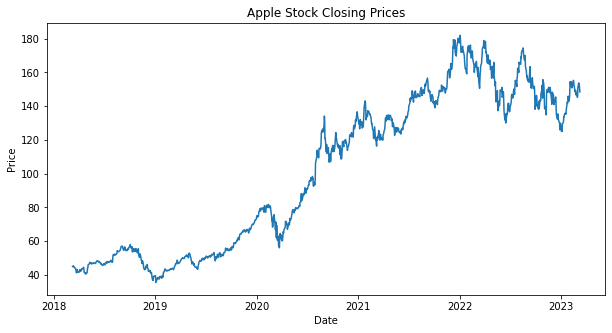

In [86]:
closing_prices = Apple["Close"]
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(closing_prices)
ax.set_title("Apple Stock Closing Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

# Yılları 4 haneli olarak yazdır
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

plt.show()

Volume trends: This analysis can be done to understand how stock trading volume changes over time. This can be done by creating a time series of trading volume. You can visualize these time series charts by plotting or by doing trendline analysis. For example

This code plots the time series of stock trading volume.


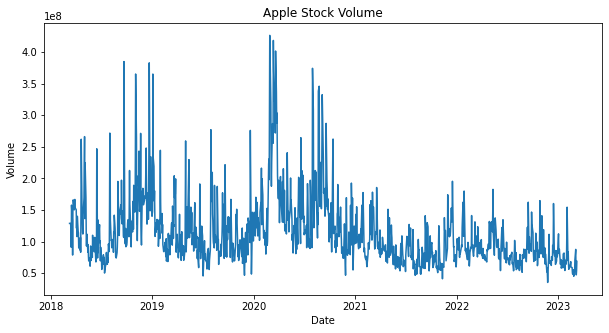

In [87]:
volume = Apple["Volume"]
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(volume)
ax.set_title("Apple Stock Volume")
ax.set_xlabel("Date")
ax.set_ylabel("Volume")

# it will writes the year in 4 chrachters 
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

plt.show()


Price and volume relationship: This analysis can be done to understand the relationship between price and volume. For example, higher trading volume is often associated with changes in prices. To do this analysis, you can visualize the relationship between both variables by plotting prices and volumes on the same chart. For example


This code plots stock closing prices and trading volume on the same chart.

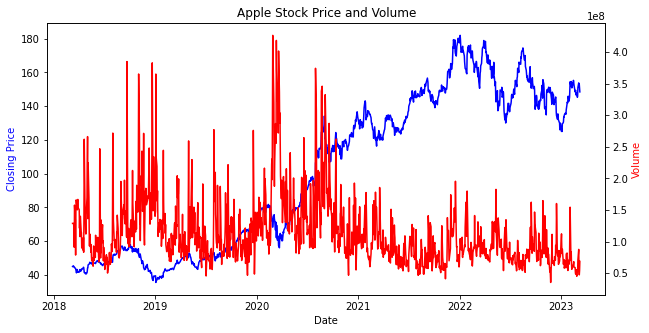

In [88]:
fig, ax1 = plt.subplots(figsize=(10,5))
# plot the closing prices 
closing_prices = Apple["Close"]
ax1.plot(closing_prices, 'b-')
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='b')

# plot the volume 
volume = Apple["Volume"]
ax2 = ax1.twinx()
ax2.plot(volume, 'r-')
ax2.set_ylabel('Volume', color='r')

plt.title("Apple Stock Price and Volume")

years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

plt.show()


Analysis of price movements: This analysis can be done to understand price movements. For example, by calculating the moving average of prices, you can understand trends or fluctuations. For example:

This code plots a moving average graph of stock closing prices.

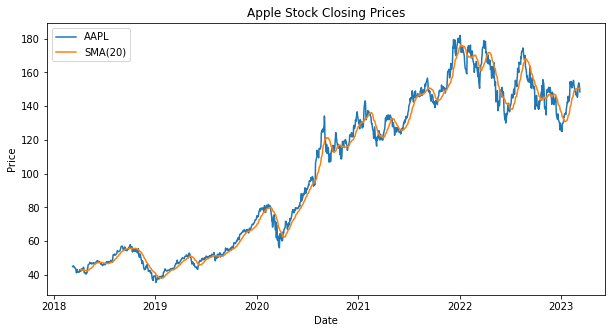

In [89]:
closing_prices = Apple["Close"]
window_size = 20
sma = closing_prices.rolling(window=window_size).mean()

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(closing_prices, label="AAPL")
ax.plot(sma, label=f"SMA({window_size})")
ax.set_title("Apple Stock Closing Prices")
ax.set_xlabel("Date")
ax.set_ylabel("Price")

# it will writes the year in 4 chrachters 
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(years_fmt)

ax.legend()
plt.show()


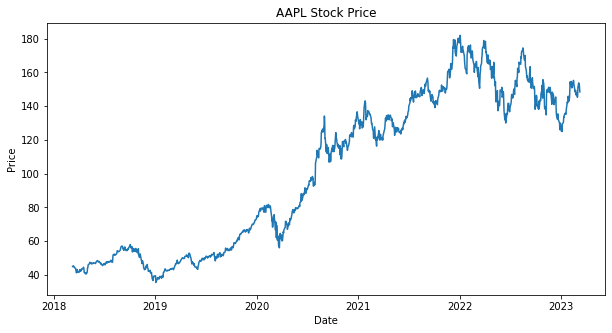

In [90]:
# settings for graph size 
fig = plt.figure(figsize=(10, 5))

# take the closing price 
closing_prices = Apple["Close"]

# plot a grapgh 
plt.plot(closing_prices)

# write the titles of the axis 
plt.title("AAPL Stock Price")
plt.xlabel("Date")
plt.ylabel("Price")

# it will writes the year in 4 chrachters 
years = mdates.YearLocator()
years_fmt = mdates.DateFormatter('%Y')
plt.gca().xaxis.set_major_locator(years)
plt.gca().xaxis.set_major_formatter(years_fmt)

plt.show()


In [91]:
Apple.to_csv("AAPL.csv")

## Model 

In [92]:
Apple = pd.read_csv("AAPL.csv", index_col="Date", parse_dates=True)

In [93]:
# Building Regression Model 
from sklearn.model_selection import train_test_split

# for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for model evaluation
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn import metrics


In [94]:
# split data into train and test sets
X = Apple.drop(['Close'], axis=1)
y = Apple['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


In [95]:
Scaler = StandardScaler().fit(X_train)

In [96]:
from sklearn.linear_model import LinearRegression

In [97]:
# Create a linear regression Model

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [98]:
# prediction on tarining data 
training_data_prediction_R = lm.predict(X_train)

# R2 ERROR 
error_score = metrics.r2_score(y_train, training_data_prediction_R)

print('R squared error With LRM: ', error_score)

R squared error With LRM:  0.9999368173917698
